In [2]:
import pandas as pd
df = pd.read_csv("Dataset\Rag_Dataset.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26580\4043918405.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=phish_words_df, ax=axes[1, 1], palette="Reds_d")


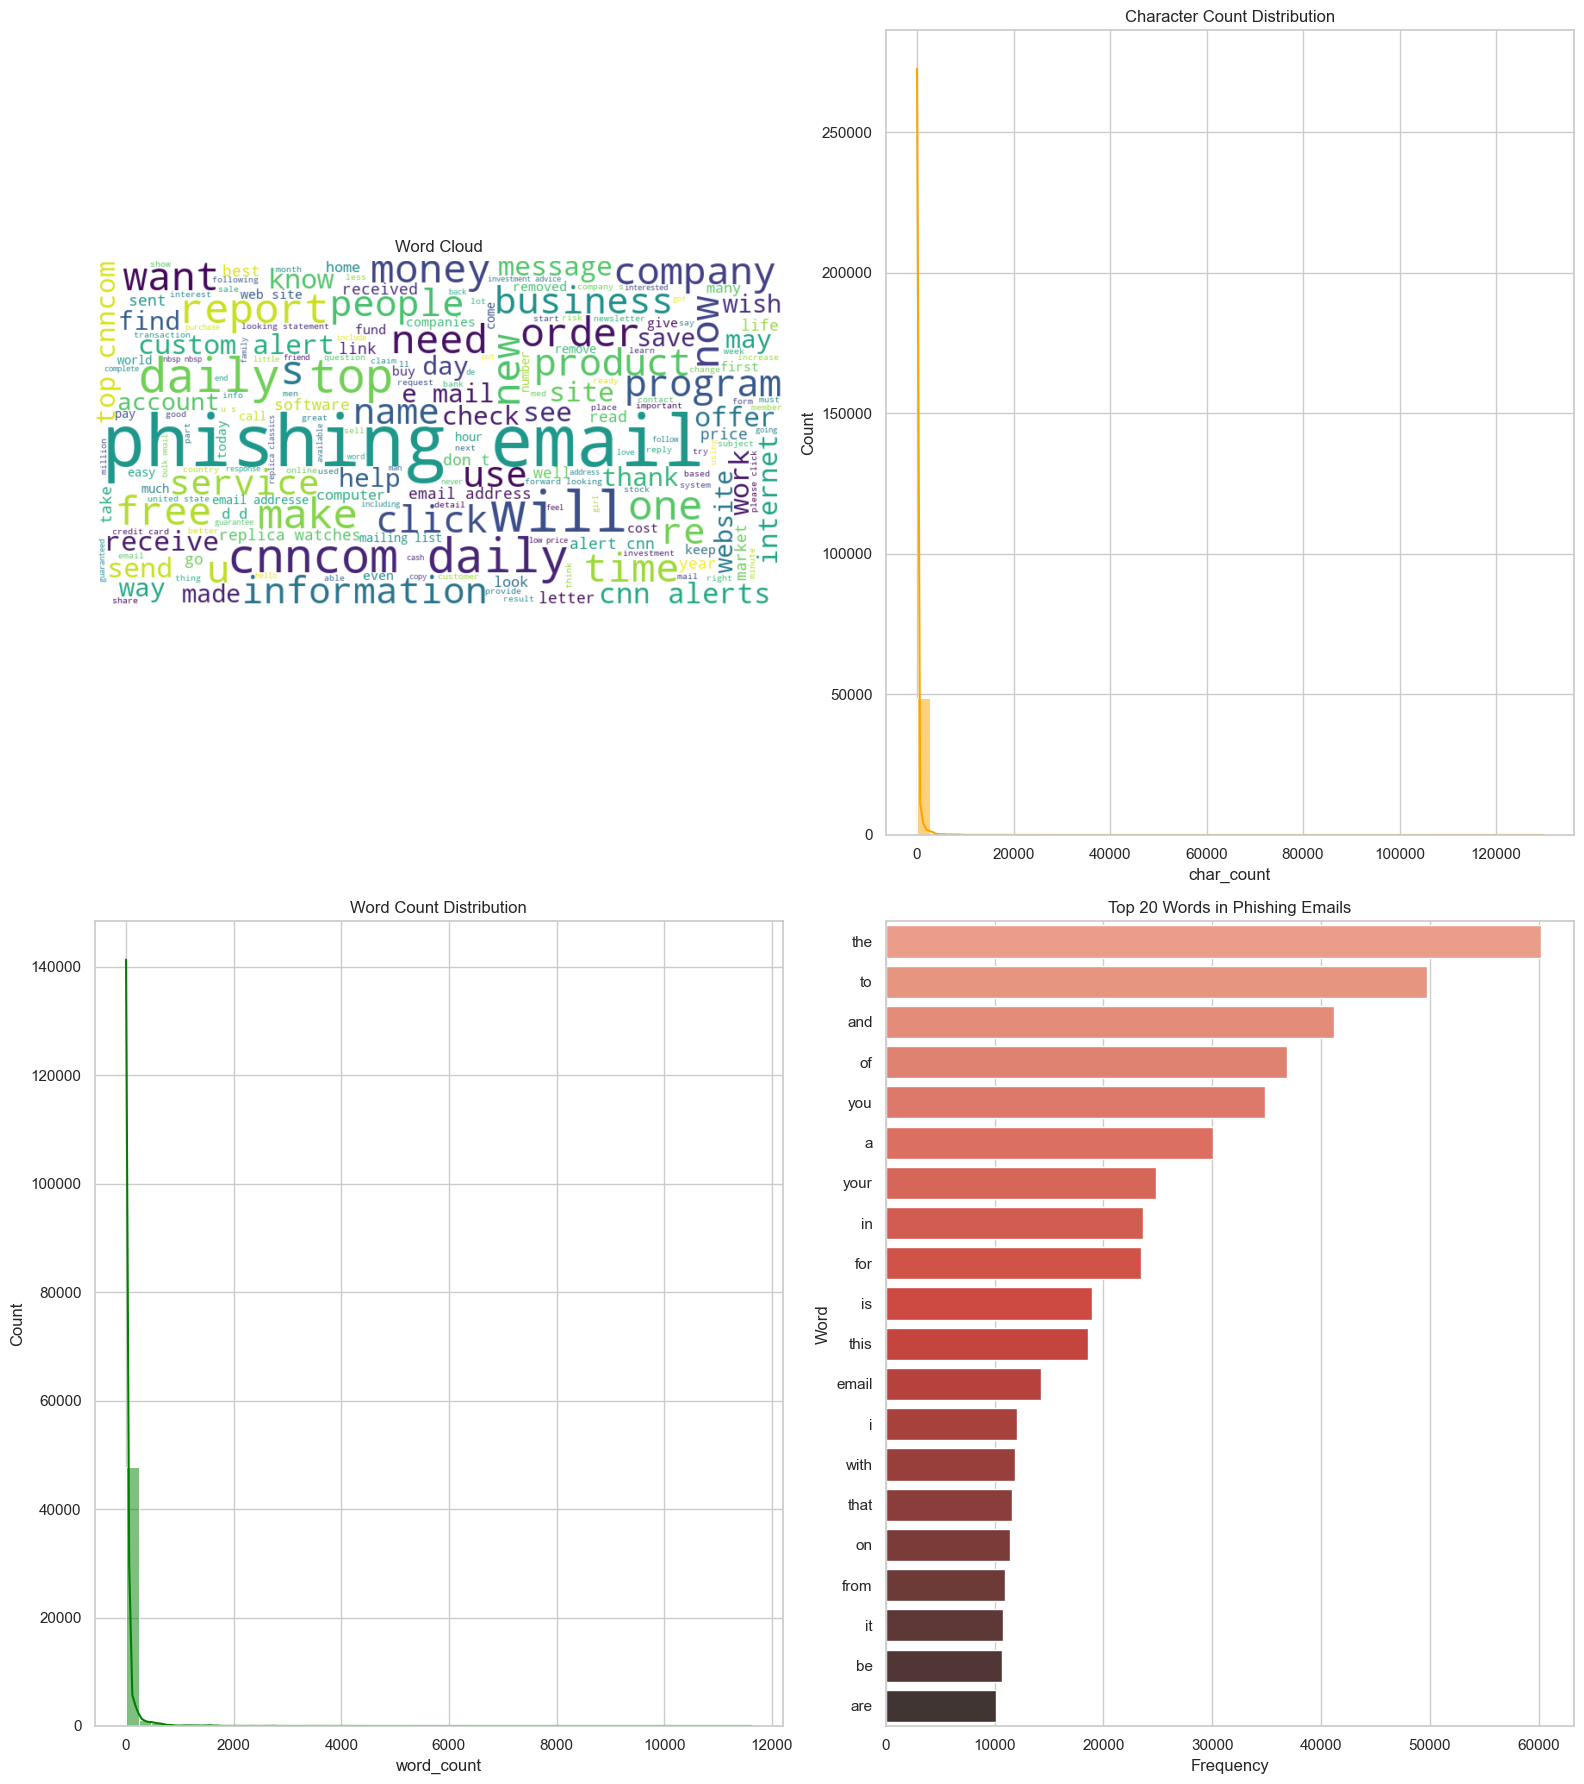

(Email Type
 Phishing Email    49940
 Name: count, dtype: int64,
 combined_text    0
 Email Type       0
 char_count       0
 word_count       0
 cleaned_text     0
 dtype: int64,
 20145)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import re

# Set visual style
sns.set(style="whitegrid")

# 1. Class Distribution
class_distribution = df["Email Type"].value_counts()

# 2. Text Length Analysis
df["char_count"] = df["combined_text"].apply(len)
df["word_count"] = df["combined_text"].apply(lambda x: len(str(x).split()))

# 3. Check for Missing Values
missing_values = df.isnull().sum()

# 4. Check for Duplicates
duplicate_count = df.duplicated().sum()

# 5. Most Common Words per Class (basic cleaning)
def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())
    return text

df["cleaned_text"] = df["combined_text"].apply(clean_text)

# Split by class
phishing_texts = " ".join(df[df["Email Type"] == "Phishing Email"]["cleaned_text"])
non_phishing_texts = " ".join(df[df["Email Type"] != "Phishing Email"]["cleaned_text"])  # In case there are other classes

phishing_words = Counter(phishing_texts.split())
non_phishing_words = Counter(non_phishing_texts.split())

top_phishing_words = phishing_words.most_common(20)
top_non_phishing_words = non_phishing_words.most_common(20)

# Generate word clouds
wordcloud_phishing = WordCloud(width=800, height=400, background_color='white').generate(phishing_texts)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(16, 18))

# Word cloud - phishing
axes[0, 0].imshow(wordcloud_phishing, interpolation="bilinear")
axes[0, 0].axis("off")
axes[0, 0].set_title("Word Cloud")

# Character count distribution
sns.histplot(df["char_count"], bins=50, kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title("Character Count Distribution")

# Word count distribution
sns.histplot(df["word_count"], bins=50, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title("Word Count Distribution")

# Top words in phishing emails
phish_words_df = pd.DataFrame(top_phishing_words, columns=["Word", "Frequency"])
sns.barplot(x="Frequency", y="Word", data=phish_words_df, ax=axes[1, 1], palette="Reds_d")
axes[1, 1].set_title("Top 20 Words in Phishing Emails")

plt.tight_layout()
plt.show()

(class_distribution, missing_values, duplicate_count)
